In [1]:
import os, shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
original_dataset_dir = '/content/drive/MyDrive/psyikoty'

In [4]:
base_dir = '/content/drive/MyDrive/mz_zbiory'

# Sprawdź, czy katalog base_dir istnieje, jeśli nie, utwórz go.
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [5]:
# Katalogi podzbiorów (zbioru treningowego, walidacyjnego i testowego).
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

In [6]:
# Katalog z treningowym zbiorem zdjęć kotów.
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
  os.mkdir(train_cats_dir)

In [7]:
# Katalog z treningowym zbiorem zdjęć psów.
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
  os.mkdir(train_dogs_dir)

In [8]:
# Katalog z walidacyjnym zbiorem zdjęć kotów.
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
  os.mkdir(validation_cats_dir)

In [9]:
# Katalog z walidacyjnym zbiorem zdjęć psów.
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
  os.mkdir(validation_dogs_dir)

In [10]:
# Katalog z testowym zbiorem zdjęć kotów.
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
  os.mkdir(test_cats_dir)

In [11]:
# Katalog z testowym zbiorem zdjęć psów.
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
  os.mkdir(test_dogs_dir)

In [12]:
# Kopiuje 1 000 pierwszych zdjęć kotów do folderu train_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_cats_dir, fname)
 if not os.path.exists(dst):
  shutil.copyfile(src, dst)

In [13]:
# Kopiuje 500 kolejnych obrazów kotów do folderu validation_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(validation_cats_dir, fname)
 if not os.path.exists(dst):
  shutil.copyfile(src, dst)

In [14]:
# Kopiuje 500 kolejnych obrazów kotów do folderu test_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(test_cats_dir, fname)
 if not os.path.exists(dst):
  shutil.copyfile(src, dst)

In [15]:
# Kopiuje 1000 pierwszych zdjęć psów do folderu train_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_dogs_dir, fname)
 if not os.path.exists(dst):
  shutil.copyfile(src, dst)

In [16]:
# Kopiuje 500 kolejnych obrazów psów do folderu validation_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(validation_dogs_dir, fname)
 if not os.path.exists(dst):
  shutil.copyfile(src, dst)

In [17]:
# Kopiuje 500 kolejnych obrazów kotów do folderu test_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(test_dogs_dir, fname)
 if not os.path.exists(dst):
  shutil.copyfile(src, dst)

In [12]:
# Funkcja zliczająca pliki w danym katalogu
def count_files(directory):
    return len(os.listdir(directory))

# Zliczanie obrazów w poszczególnych zbiorach
train_cats_count = count_files(train_cats_dir)
validation_cats_count = count_files(validation_cats_dir)
test_cats_count = count_files(test_cats_dir)

train_dogs_count = count_files(train_dogs_dir)
validation_dogs_count = count_files(validation_dogs_dir)
test_dogs_count = count_files(test_dogs_dir)

# Wyświetlanie wyników
print("Koty:")
print("Treningowy zbiór:", train_cats_count)
print("Walidacyjny zbiór:", validation_cats_count)
print("Testowy zbiór:", test_cats_count)
print("\nPsy:")
print("Treningowy zbiór:", train_dogs_count)
print("Walidacyjny zbiór:", validation_dogs_count)
print("Testowy zbiór:", test_dogs_count)

Koty:
Treningowy zbiór: 1000
Walidacyjny zbiór: 500
Testowy zbiór: 500

Psy:
Treningowy zbiór: 1000
Walidacyjny zbiór: 500
Testowy zbiór: 500


In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# Przeskalowuje wszystkie obrazy o współczynnik 1/255.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
 # Katalog docelowy.
 train_dir,
 # Zmienia rozdzielczość wszystkich obrazów na 150x150.
 target_size=(150, 150),
 batch_size=20,
 # Używamy funkcji binary_crossentropy w charakterze funkcji straty, a więc potrzebujemy binarnych etykiet.
 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
 print('kształt danych wsadowych:', data_batch.shape)
 print('kształt etykiet danych wsadowych:', labels_batch.shape)
 break

kształt danych wsadowych: (20, 150, 150, 3)
kształt etykiet danych wsadowych: (20,)


In [18]:
# Tworzenie generatorów danych treningowych i walidacyjnych
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
# Definiowanie modelu (przykładowy model CNN)
from keras import layers
from keras import models

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# Kompilacja modelu
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
def is_valid_image(file_path):
  try:
    img = Image.open(file_path)
    img.verify()
    return True
  except (IOError, SyntaxError) as e:
    print(f"Nieprawidłowy obraz: {file_path}")
    return False

In [25]:
# Adjusting steps_per_epoch based on the number of batches generated by train_generator
steps_per_epoch = train_generator.samples // train_generator.batch_size

# Adjusting validation_steps based on the number of batches generated by validation_generator
validation_steps = validation_generator.samples // validation_generator.batch_size
# Dopasowanie modelu przy użyciu generatora
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps)

<ipython-input-25-8125ed02c733>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 501s 5s/step - loss: 0.6990 - accuracy: 0.5335 - val_loss: 0.6912 - val_accuracy: 0.5820
Epoch 2/30
100/100 [==============================] - 109s 1s/step - loss: 0.6822 - accuracy: 0.5795 - val_loss: 0.6880 - val_accuracy: 0.5930
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6555 - accuracy: 0.6145 - val_loss: 0.6269 - val_accuracy: 0.6210
Epoch 4/30
100/100 [==============================] - 117s 1s/step - loss: 0.6278 - accuracy: 0.6555 - val_loss: 0.6416 - val_accuracy: 0.6510
Epoch 5/30
100/100 [==============================] - 112s 1s/step - loss: 0.5718 - accuracy: 0.6930 - val_loss: 0.6756 - val_accuracy: 0.6040
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.5294 - accuracy: 0.7335 - val_loss: 0.5940 - val_accuracy: 0.6850
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.4639 - accuracy: 0.7855 - val_loss: 0.6299 - val_accuracy: 0.6860

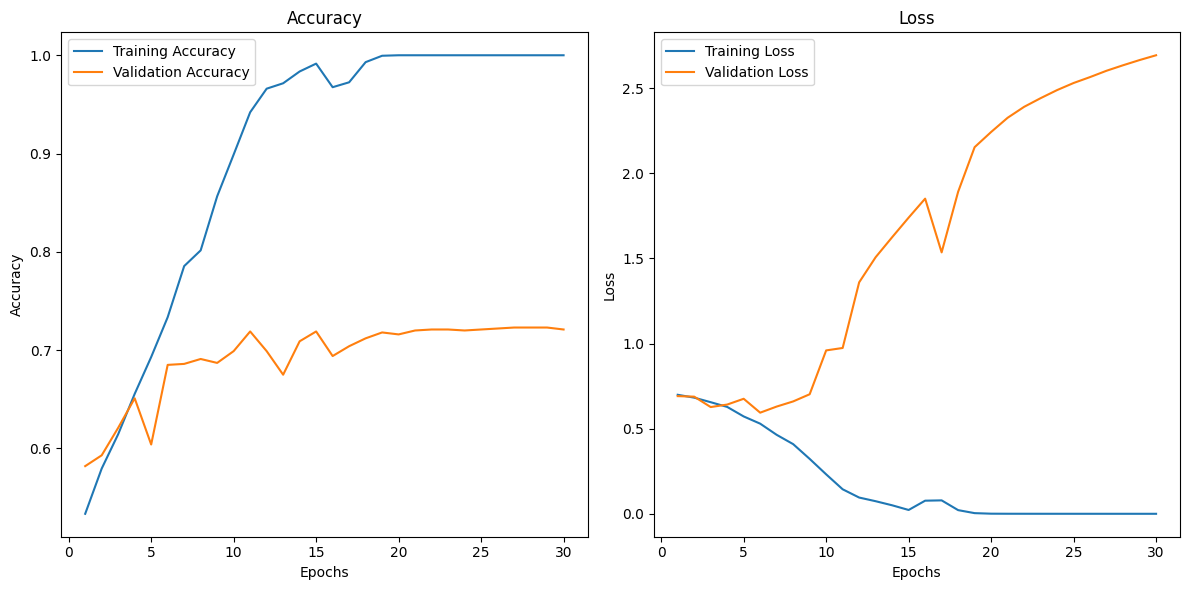

In [26]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss from history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating plots
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Operacja importowania modułu zawierającego narzędzia przetwarzajace obrazy.
from keras.preprocessing import image

In [28]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [29]:
# Wybieramy obraz do zmodyfikowania.
img_path = fnames[3]

In [30]:
# Wczytujemy obraz i zmieniamy jego rozdzielczość.
img = image.load_img(img_path, target_size=(150, 150))

In [31]:
# Zamieniamy obraz w tablicę Numpy o kształcie (150, 150, 3).
x = image.img_to_array(img)

In [32]:
# Zmieniamy kształt na (1, 150, 150, 3).
x = x.reshape((1,) + x.shape)

In [33]:
import matplotlib.pyplot as plt

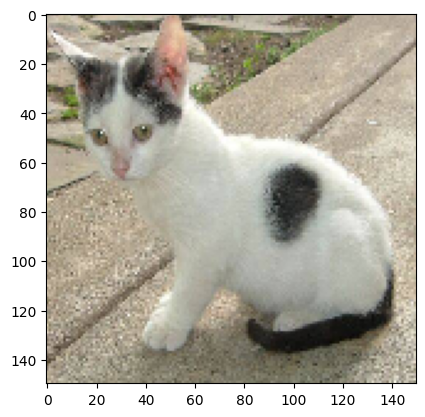

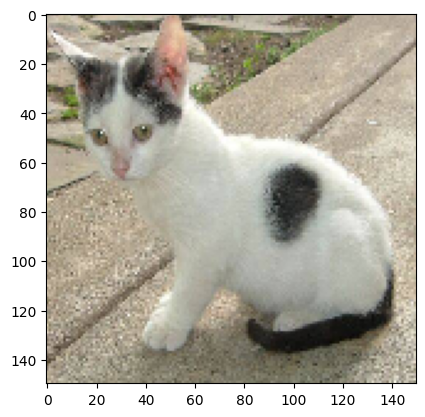

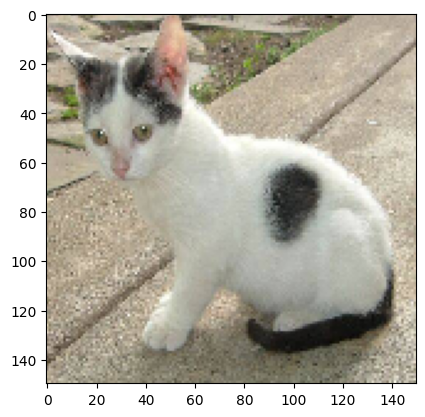

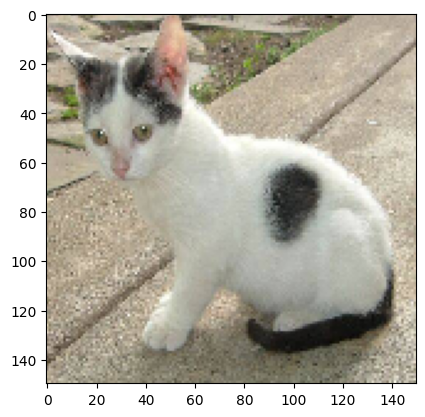

In [34]:
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [35]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
# Utworzenie generatora dla danych treningowych z augmentacją
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [37]:
# Utworzenie generatora dla danych walidacyjnych (bez augmentacji)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
# Generowanie wsadów danych treningowych
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [39]:
# Generowanie wsadów danych walidacyjnych
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [40]:
# Adjusting steps_per_epoch based on the number of batches generated by train_generator
steps_per_epoch = train_generator.samples // train_generator.batch_size

# Adjusting validation_steps based on the number of batches generated by validation_generator
validation_steps = validation_generator.samples // validation_generator.batch_size

# Fit the model with adjusted steps_per_epoch and validation_steps
history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

<ipython-input-40-3760312a0d31>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
62/62 [==============================] - 125s 2s/step - loss: 0.8483 - accuracy: 0.6138 - val_loss: 0.5837 - val_accuracy: 0.7117
Epoch 2/30
62/62 [==============================] - 124s 2s/step - loss: 0.6131 - accuracy: 0.6672 - val_loss: 0.5247 - val_accuracy: 0.7198
Epoch 3/30
62/62 [==============================] - 118s 2s/step - loss: 0.6176 - accuracy: 0.6636 - val_loss: 0.5129 - val_accuracy: 0.7500
Epoch 4/30
62/62 [==============================] - 125s 2s/step - loss: 0.5776 - accuracy: 0.6921 - val_loss: 0.5468 - val_accuracy: 0.7440
Epoch 5/30
62/62 [==============================] - 123s 2s/step - loss: 0.5568 - accuracy: 0.7185 - val_loss: 0.5493 - val_accuracy: 0.7026
Epoch 6/30
62/62 [==============================] - 123s 2s/step - loss: 0.5594 - accuracy: 0.7200 - val_loss: 0.4847 - val_accuracy: 0.7752
Epoch 7/30
62/62 [==============================] - 124s 2s/step - loss: 0.5366 - accuracy: 0.7302 - val_loss: 0.4806 - val_accuracy: 0.7722
Epoch 8/30
62

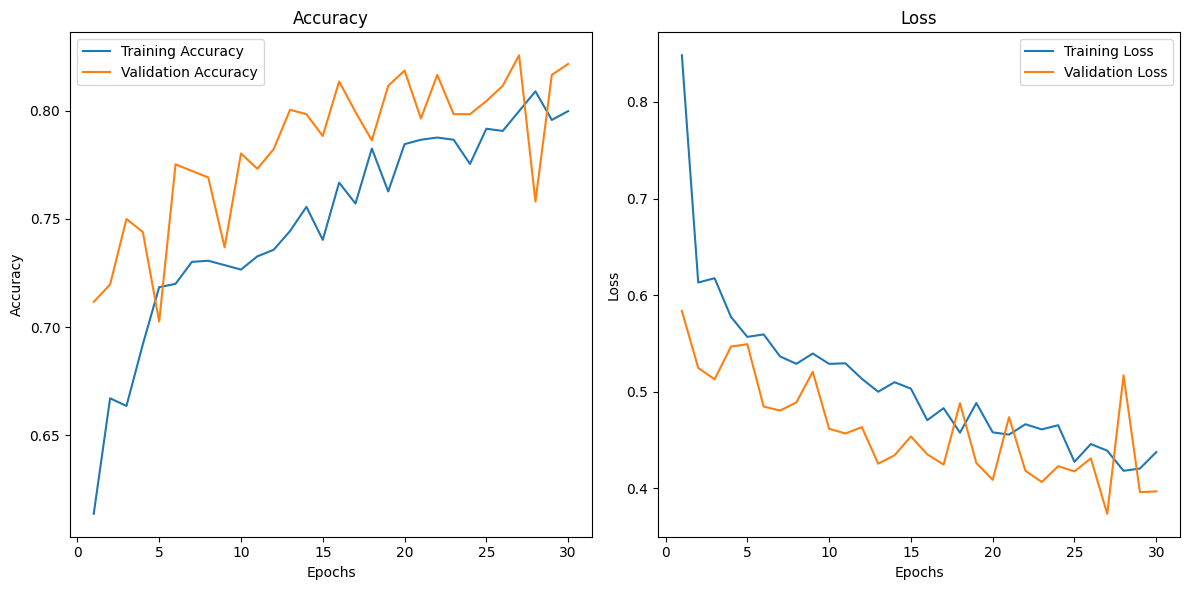

In [41]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss from history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating plots
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Przed augmentacją strata walidacyjna z każdą kolejna epoką wzrastała, natomiast po dokonaniu augmentacji widoczny jest spadek tej starty. W przypadku dokładności walidacyjnej przed augmentacją po 30 epokach zaszła pewna stabilizacja osiągająca +- 70%, natomiast po augmentacji nadal następują skoki wahające się od 70-80%. Dokładność treningowa przed augmentacją w szybkim tempie osiągnęła 100%, natomiast po, widoczny jest stały wzrost, po każdej epoce, na 30 epoce wartość osiągnela 80%.